# Data Collection Part

In [1]:
import numpy as np  
import pandas as pd
from sklearn.datasets import fetch_20newsgroups  

In [3]:
# Load full 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data
print("Total Documents Loaded:", len(documents))

Total Documents Loaded: 18846


In [4]:
categories = newsgroups.target_names
labels = newsgroups.target  # Numerical category labels

In [5]:
# Create a DataFrame
df = pd.DataFrame({'Category': [categories[label] for label in labels], 'Text': documents})

In [9]:
# Save to CSV file
df.to_csv('20newsgroups_dataset.csv', index=False, encoding='utf-8')
print("Dataset saved as 20newsgroups_dataset.csv")

Dataset saved as 20newsgroups_dataset.csv


In [11]:
df

,Category,Text
0,rec.sport.hockey,\n\nI am sure some bashers of Pens fans are pr...
1,comp.sys.ibm.pc.hardware,My brother is in the market for a high-perform...
2,talk.politics.mideast,\n\n\n\n\tFinally you said what you dream abou...
3,comp.sys.ibm.pc.hardware,\nThink!\n\nIt's the SCSI card doing the DMA t...
4,comp.sys.mac.hardware,1) I have an old Jasmine drive which I cann...
...,...,...
18841,sci.med,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...
18842,sci.electronics,\nNot in isolated ground recepticles (usually ...
18843,comp.sys.ibm.pc.hardware,I just installed a DX2-66 CPU in a clone mothe...
18844,comp.graphics,\nWouldn't this require a hyper-sphere. In 3-...


# Step 2: Data Preparation & Cleaning

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  18846 non-null  object
 1   Text      18846 non-null  object
dtypes: object(2)
memory usage: 294.6+ KB


In [16]:
df.describe()

,Category,Text
count,18846,18846
unique,20,18287
top,rec.sport.hockey,
freq,999,380


In [18]:
df.isna().sum()

Category    0
Text        0
dtype: int64

In [20]:
# Drop rows where 'text' is NaN
df.dropna(subset=['Text'], inplace=True)

In [22]:
# Check for null values again
df.isnull().sum()

Category    0
Text        0
dtype: int64

In [24]:
df

,Category,Text
0,rec.sport.hockey,\n\nI am sure some bashers of Pens fans are pr...
1,comp.sys.ibm.pc.hardware,My brother is in the market for a high-perform...
2,talk.politics.mideast,\n\n\n\n\tFinally you said what you dream abou...
3,comp.sys.ibm.pc.hardware,\nThink!\n\nIt's the SCSI card doing the DMA t...
4,comp.sys.mac.hardware,1) I have an old Jasmine drive which I cann...
...,...,...
18841,sci.med,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...
18842,sci.electronics,\nNot in isolated ground recepticles (usually ...
18843,comp.sys.ibm.pc.hardware,I just installed a DX2-66 CPU in a clone mothe...
18844,comp.graphics,\nWouldn't this require a hyper-sphere. In 3-...


In [26]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [29]:
# Define text cleaning function
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)                 # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)            # Remove special characters/digits
    text = text.lower()                               # Convert to lowercase
    words = text.split()
    words = [w for w in words if w not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]  # Lemmatization
    return ' '.join(words)

In [31]:
# Apply the clean_text function to 'text' column
df['clean_text'] = df['Text'].apply(clean_text)

In [33]:
# Show cleaned data
df[['clean_text', 'Category']].head()

,clean_text,Category
0,sure bashers pen fan pretty confused lack kind...,rec.sport.hockey
1,brother market high performance video card sup...,comp.sys.ibm.pc.hardware
2,finally said dream mediterranean new area grea...,talk.politics.mideast
3,think scsi card dma transfer disk scsi card dm...,comp.sys.ibm.pc.hardware
4,old jasmine drive cannot use new system unders...,comp.sys.mac.hardware


In [35]:
# now, the data is clean 
df

,Category,Text,clean_text
0,rec.sport.hockey,\n\nI am sure some bashers of Pens fans are pr...,sure bashers pen fan pretty confused lack kind...
1,comp.sys.ibm.pc.hardware,My brother is in the market for a high-perform...,brother market high performance video card sup...
2,talk.politics.mideast,\n\n\n\n\tFinally you said what you dream abou...,finally said dream mediterranean new area grea...
3,comp.sys.ibm.pc.hardware,\nThink!\n\nIt's the SCSI card doing the DMA t...,think scsi card dma transfer disk scsi card dm...
4,comp.sys.mac.hardware,1) I have an old Jasmine drive which I cann...,old jasmine drive cannot use new system unders...
...,...,...,...
18841,sci.med,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,dn nyeda cnsvax uwec edu david nye dn neurolog...
18842,sci.electronics,\nNot in isolated ground recepticles (usually ...,isolated ground recepticles usually unusual co...
18843,comp.sys.ibm.pc.hardware,I just installed a DX2-66 CPU in a clone mothe...,installed dx cpu clone motherboard tried mount...
18844,comp.graphics,\nWouldn't this require a hyper-sphere. In 3-...,require hyper sphere space point specifies sph...


In [37]:
df.drop(columns = 'Text', inplace = True)

In [39]:
df

,Category,clean_text
0,rec.sport.hockey,sure bashers pen fan pretty confused lack kind...
1,comp.sys.ibm.pc.hardware,brother market high performance video card sup...
2,talk.politics.mideast,finally said dream mediterranean new area grea...
3,comp.sys.ibm.pc.hardware,think scsi card dma transfer disk scsi card dm...
4,comp.sys.mac.hardware,old jasmine drive cannot use new system unders...
...,...,...
18841,sci.med,dn nyeda cnsvax uwec edu david nye dn neurolog...
18842,sci.electronics,isolated ground recepticles usually unusual co...
18843,comp.sys.ibm.pc.hardware,installed dx cpu clone motherboard tried mount...
18844,comp.graphics,require hyper sphere space point specifies sph...


# Step 3: Vectorization & EDA

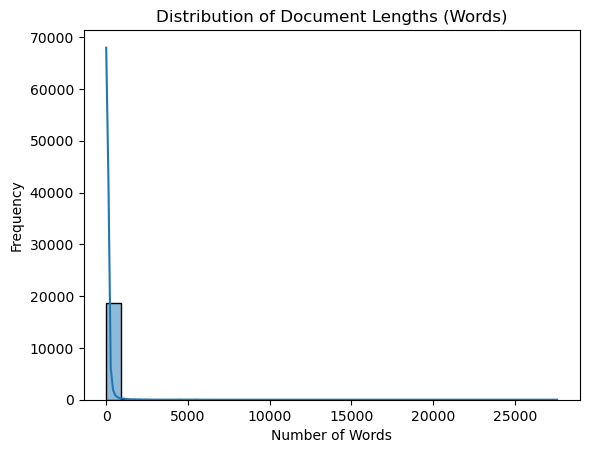

In [46]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

text_column = 'clean_text'

# --- 1. Document Length Distribution ---
df['text_length'] = df[text_column].apply(lambda x: len(x.split()))
# plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Document Lengths (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

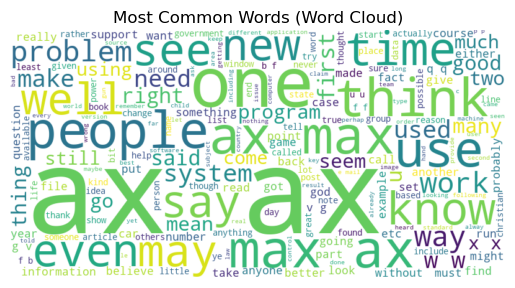

In [48]:
# --- 2. Word Cloud of All Texts ---
all_text = " ".join(df[text_column].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
# plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words (Word Cloud)")
plt.show()

In [50]:
# --- 3. TF-IDF Vectorizer Preview ---
vectorizer = TfidfVectorizer(max_features=20)  # limit to top 20 words for visibility
X_tfidf = vectorizer.fit_transform(df[text_column])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

In [52]:
X_tfidf

<18846x20 sparse matrix of type '<class 'numpy.float64'>'
	with 56674 stored elements in Compressed Sparse Row format>

/var/folders/42/tss36s0d5198pnxyd7jy0s5w0000gn/T/ipykernel_5303/836707191.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_mean.values, y=tfidf_mean.index, palette="viridis")


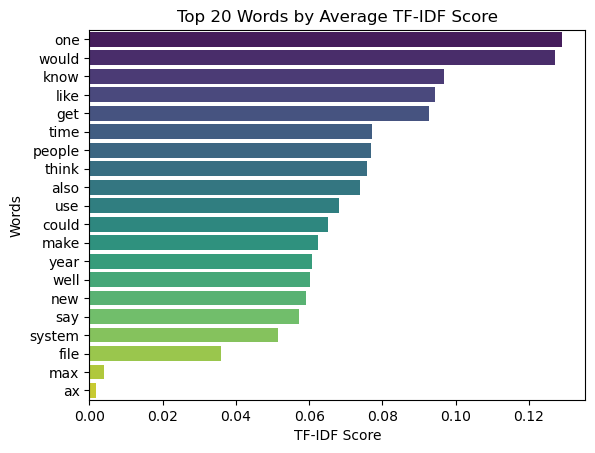

In [54]:
# --- 4. Plot Top TF-IDF Terms ---
tfidf_mean = tfidf_df.mean().sort_values(ascending=False)
# plt.figure(figsize=(10, 5))
sns.barplot(x=tfidf_mean.values, y=tfidf_mean.index, palette="viridis")
plt.title("Top 20 Words by Average TF-IDF Score")
plt.xlabel("TF-IDF Score")
plt.ylabel("Words")
plt.show()

In [56]:
tfidf_df

,also,ax,could,file,get,know,like,make,max,new,one,people,say,system,think,time,use,well,would,year
0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.0,0.0,0.0,0.000000,0.253591,0.496712,0.000000,0.0,0.311747,0.223633,0.000000,0.610520,0.000000,0.000000,0.270531,0.000000,0.000000,0.000000,0.309595
3,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.714253,0.699887,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.0,0.0,0.0,0.000000,0.288044,0.000000,0.000000,0.0,0.177050,0.254015,0.000000,0.000000,0.756079,0.000000,0.000000,0.499505,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18841,0.561932,0.0,0.0,0.0,0.524129,0.000000,0.337981,0.197145,0.0,0.000000,0.000000,0.192354,0.000000,0.000000,0.375715,0.184079,0.000000,0.000000,0.000000,0.210660
18842,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18843,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18844,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# 4 Feature Engineering And Selection

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

text_column = 'clean_text'

# --- 1. TF-IDF Vectorization ---
vectorizer = TfidfVectorizer(
    max_df = 0.4,       # ignore very common words
    min_df = 2,         # ignore very rare words
    max_features = 4000,  # limit vocab size
    stop_words='english', 
    ngram_range=(1, 2), # unigrams + bigrams
    sublinear_tf = True,# compress high TF values
    norm = 'l2' # normalize vectors
 )

In [147]:
X_tfidf = vectorizer.fit_transform(df[text_column])

print("TF-IDF shape:", X_tfidf.shape)  # rows = documents, cols = features

TF-IDF shape: (18846, 4000)


In [148]:
# --- 2. Optional: Dimensionality Reduction using TruncatedSVD ---
svd = TruncatedSVD(n_components=100, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)

print("Reduced feature shape:", X_reduced.shape)

Reduced feature shape: (18846, 100)


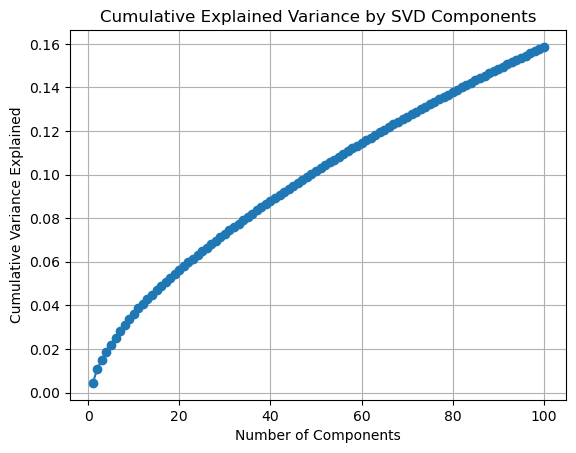

In [149]:
# --- 3. Variance Explained Plot (optional) ---
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(range(1, len(explained)+1), explained, marker='o')
plt.title('Cumulative Explained Variance by SVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.show()

In [150]:
# --- 4. Save the feature matrix (optional for next step) ---
import joblib
joblib.dump(X_reduced, 'tfidf_reduced_features.pkl')  # For K-Means input
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')       # To use later if needed

['tfidf_vectorizer.pkl']

# ✅ Step 5: Model Selection & Training

In [153]:
import joblib
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- 1. Load TF-IDF Features ---
X = joblib.load('tfidf_reduced_features.pkl')  # from Step 4

# --- 2. Elbow Method to Find Best k ---
wcss = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [157]:
wcss

[2764.670779092538,
 2704.6406913069154,
 2666.0605567062844,
 2636.0387467863284,
 2597.6227871198,
 2550.1069742106356,
 2524.035636697804,
 2497.918897041848,
 2483.5725180654213]

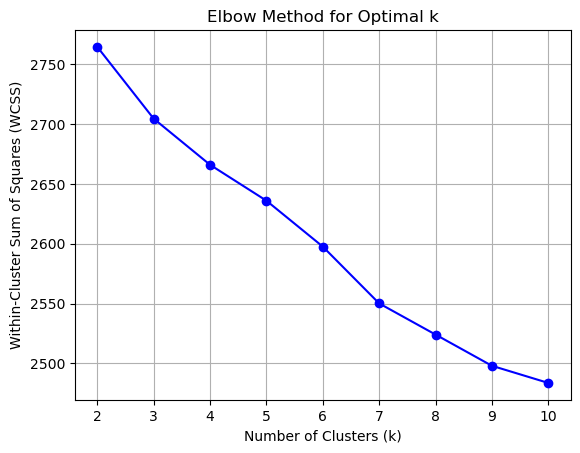

In [158]:
# Plot WCSS vs. k
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

In [162]:
# --- 3. Silhouette Score ---
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    sil_score = silhouette_score(X, labels)
    print(f'k = {k} → Silhouette Score: {sil_score:.4f}')

k = 2 → Silhouette Score: 0.0978
k = 3 → Silhouette Score: 0.0323
k = 4 → Silhouette Score: 0.0307
k = 5 → Silhouette Score: 0.0281
k = 6 → Silhouette Score: 0.0329
k = 7 → Silhouette Score: 0.0393
k = 8 → Silhouette Score: 0.0376
k = 9 → Silhouette Score: 0.0326
k = 10 → Silhouette Score: 0.0314


In [164]:
# --- 4. Train Final Model with Best k ---
best_k = 2  # You choose based on Elbow/Silhouette
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = final_kmeans.fit_predict(X)

In [166]:
# --- 5. Save Model & Cluster Labels ---
joblib.dump(final_kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [168]:
df

,Category,clean_text,text_length,cluster
0,rec.sport.hockey,sure bashers pen fan pretty confused lack kind...,71,1
1,comp.sys.ibm.pc.hardware,brother market high performance video card sup...,35,0
2,talk.politics.mideast,finally said dream mediterranean new area grea...,115,1
3,comp.sys.ibm.pc.hardware,think scsi card dma transfer disk scsi card dm...,71,0
4,comp.sys.mac.hardware,old jasmine drive cannot use new system unders...,56,0
...,...,...,...,...
18841,sci.med,dn nyeda cnsvax uwec edu david nye dn neurolog...,165,1
18842,sci.electronics,isolated ground recepticles usually unusual co...,18,1
18843,comp.sys.ibm.pc.hardware,installed dx cpu clone motherboard tried mount...,50,0
18844,comp.graphics,require hyper sphere space point specifies sph...,25,1


In [170]:
# Add clusters to your dataframe
df['cluster'] = cluster_labels
print(df[['clean_text', 'cluster']].head())

                                          clean_text  cluster
0  sure bashers pen fan pretty confused lack kind...        1
1  brother market high performance video card sup...        0
2  finally said dream mediterranean new area grea...        1
3  think scsi card dma transfer disk scsi card dm...        0
4  old jasmine drive cannot use new system unders...        0


# ✅ Step 6: Model Evaluation & Optimization

In [177]:
from sklearn.metrics import silhouette_score

# Already calculated, but you can confirm
score = silhouette_score(X, df['cluster'])
print("Silhouette Score for k =", best_k, "is", round(score, 4))

Silhouette Score for k = 2 is 0.0978


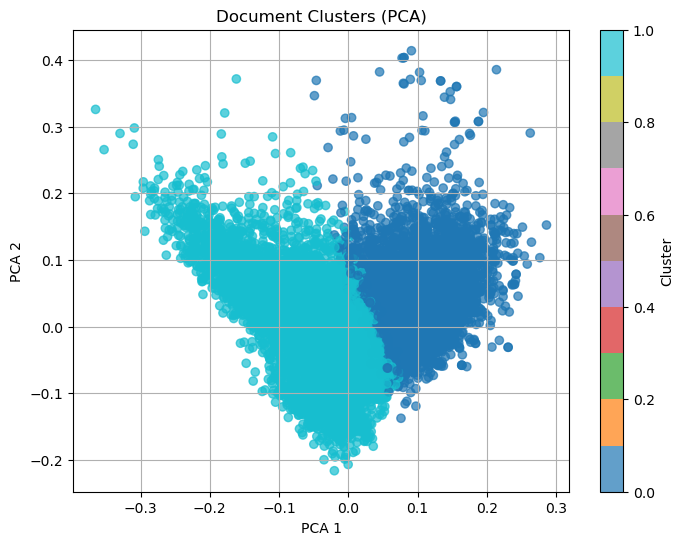

In [178]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(
    reduced_features[:, 0],
    reduced_features[:, 1],
    c=df['cluster'],
    cmap='tab10',
    alpha=0.7
)
plt.title('Document Clusters (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

In [181]:
df

,Category,clean_text,text_length,cluster
0,rec.sport.hockey,sure bashers pen fan pretty confused lack kind...,71,1
1,comp.sys.ibm.pc.hardware,brother market high performance video card sup...,35,0
2,talk.politics.mideast,finally said dream mediterranean new area grea...,115,1
3,comp.sys.ibm.pc.hardware,think scsi card dma transfer disk scsi card dm...,71,0
4,comp.sys.mac.hardware,old jasmine drive cannot use new system unders...,56,0
...,...,...,...,...
18841,sci.med,dn nyeda cnsvax uwec edu david nye dn neurolog...,165,1
18842,sci.electronics,isolated ground recepticles usually unusual co...,18,1
18843,comp.sys.ibm.pc.hardware,installed dx cpu clone motherboard tried mount...,50,0
18844,comp.graphics,require hyper sphere space point specifies sph...,25,1


In [183]:
# Sample 3 documents from each cluster
for i in range(best_k):
    print(f"\nCluster {i}:\n")
    sample_texts = df[df['cluster'] == i]['clean_text'].sample(3, random_state=42)
    for text in sample_texts:
        print("-", text[:100], "...\n")


Cluster 0:

- hi net due investigation would like study following article peterson ray tracing general b spline pr ...

- interestingly enough cdrom came quadra disk system install kodak photo cd sampler alice ocean cdrom  ...

- getting garbled output serial printing thru window work etc occurred several system go laserjet used ...


Cluster 1:

- learn build deyhdrator easily book hungry hiker guide good food gretchen mchugh heat source watt lig ...

- handful anti gun zealot telling public right self defense le importance interest handgun control inc ...

- principle underlying device well establish principle psychology called entrainment whereby external  ...

